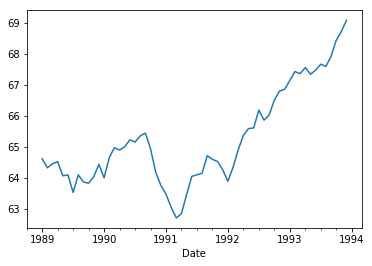

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools as it
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
DS = pd.read_excel('testing.xlsx', index_col = 'Date')
#ds = pd.read_excel('training.xlsx', col_names = True, col_types = ("numeric","date","numeric"))
#DS = pd.read_csv("training.csv", sep=';', parse_dates=['Date'], index_col='Date')
#DS.date=pd.to_datetime(DS)
#ds.head()
first=DS.Value
second=DS.index
#first=first.resample('H')
#print(first)
first.plot()
#first.head()


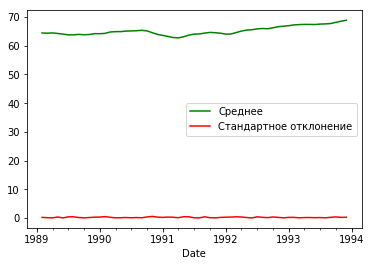

In [36]:
first.rolling(window=2).mean().plot(color='g',legend=True, label='Среднее')
first.rolling(window=2).std().plot(color='r',legend=True, label='Стандартное отклонение')
#first.plot(color='y',legend=True, label='Временной ряд')


In [37]:
#Тест Дики-Фуллера

X=sm.tsa.adfuller(first)
print('Тестовая статистика',X[0])
print('Приблизительная p-ценность', X[1])
print('Критические значения', X[4])
if X[0] > X[4]['5%']:
    print('Есть единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')


Тестовая статистика 0.45342782263595394
Приблизительная p-ценность 0.9833866795378372
Критические значения {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Есть единичные корни, ряд не стационарен


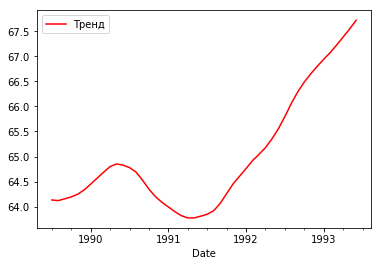

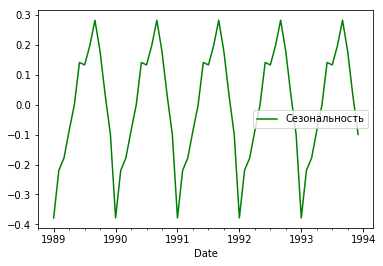

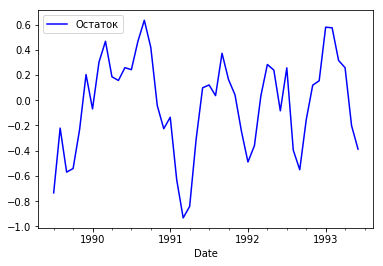

In [38]:
#Аддитивная модель

decompos = seasonal_decompose(DS.Value, model="additive")
decompos.trend.plot(color='r', label='Тренд', legend=True)
plt.show()
decompos.seasonal.plot(color='g', label='Сезональность', legend=True)
plt.show()
decompos.resid.plot(color='b', label='Остаток', legend=True)
plt.show()

In [39]:
#Проверка Тренда

decompos.trend.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')


adf:  1.1269216882745567
p-value:  0.9954399639175244
Critical values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Eсть единичные корни, ряд не стационарен


In [40]:
#Проверка сезональности

decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -1486096705733366.0
p-value:  0.0
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Eдиничных корней нет, ряд стационарен


In [41]:
#Проверка остаточного

decompos.resid.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -3.238140202136583
p-value:  0.017880433585478455
Critical values:  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Eдиничных корней нет, ряд стационарен


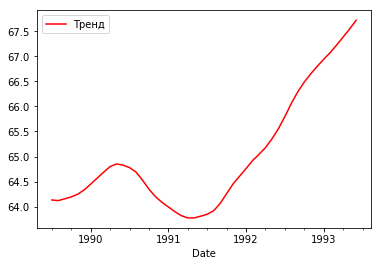

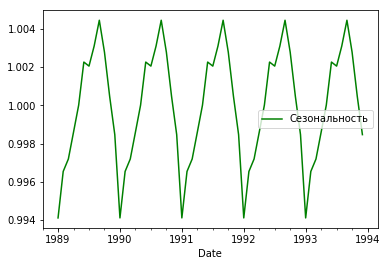

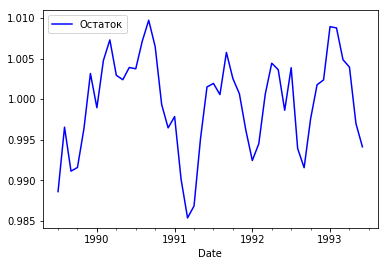

In [42]:
#Мультипликативная модель

decompos = seasonal_decompose(first, model="multiplicate")
decompos.trend.plot(color='r', label='Тренд', legend=True)
plt.show()
decompos.seasonal.plot(color='g', label='Сезональность', legend=True)
plt.show()
decompos.resid.plot(color='b', label='Остаток', legend=True)
plt.show()

In [43]:
#Проверка Тренда

decompos.trend.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  1.1269216882745567
p-value:  0.9954399639175244
Critical values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Eсть единичные корни, ряд не стационарен


In [44]:
#Проверка сезональности

decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -16175941712395.963
p-value:  0.0
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Eдиничных корней нет, ряд стационарен


In [45]:
#Проверка остаточного

decompos.resid.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -3.2366863296383652
p-value:  0.01795694592339656
Critical values:  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Eдиничных корней нет, ряд стационарен


In [46]:
#Определяем порядок интегрированности ряда

i = 1
Y = sm.tsa.adfuller(first)
if Y[0] > Y[4]['5%']:
    D = first.diff(periods=1).dropna()
else:
    i = 0
k = 0
while i == 1:
    Y = sm.tsa.adfuller(D, autolag='AIC')
    if Y[0] <= Y[4]['5%']:
        i = 0
    D = D.diff(periods=1).dropna()
    k = k + 1

if k:
    print("Ряд является интегрированным порядка ", k)

Ряд является интегрированным порядка  1


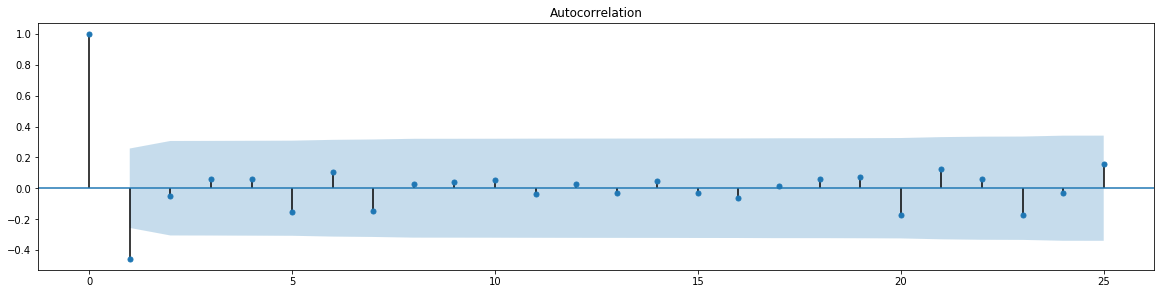

In [47]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_acf(D, lags=25, ax=ax1)

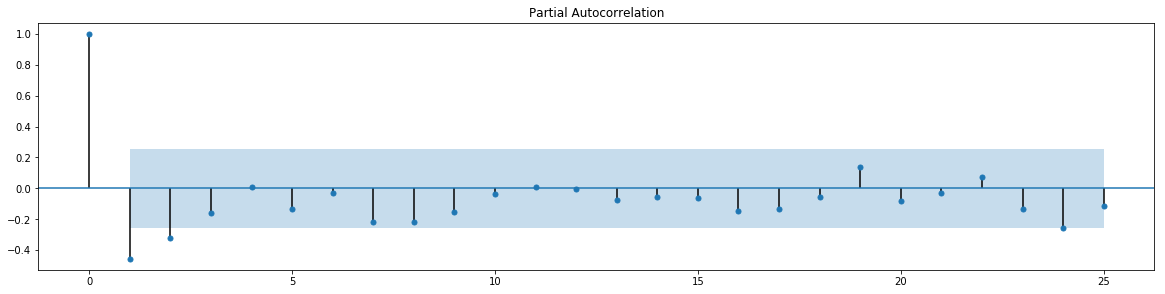

In [48]:
fig = plt.figure(figsize=(20, 10))
ax2 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_pacf(D, lags=25, ax=ax2)

In [49]:
#По графикам определяем значения

In [50]:
#Посчитаем количество моделей на заданных критериях

ps = range(0,5)
qs = range(0,6)
parametrs=it.product(ps,qs)#,Ps,Qs)
parametrs_list=list(parametrs)
len(parametrs_list)

30

In [51]:
results = []
best_aic=float("inf")
#warnings.filterwarnings('ignore')

for param in parametrs_list:
    try:
        model=sm.tsa.statespace.SARIMAX(first, order=(param[0], k, param[1]), trend='ct').fit()#, seasonal_order(param[2],k,param[3],1))
    except:
        #print('warning parametrs ', param)
        continue
    aic=model.aic
    if aic<best_aic:
        best_model=model
        best_aic=aic
        best_param=param
    results.append([param,model.aic])
result_table = pd.DataFrame(results)
result_table.columns = ['parametrs','aic']
print(result_table.sort_values(by = 'aic', ascending=[True]).head())
#warnings.filterwarnings('default')

   parametrs        aic
5     (1, 0)  42.475792
0     (0, 1)  42.558041
11    (2, 0)  44.259385
6     (1, 1)  44.309055
1     (0, 2)  44.375303


In [52]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -17.238
Date:                Fri, 07 Dec 2018   AIC                             42.476
Time:                        23:48:33   BIC                             50.853
Sample:                    01-01-1989   HQIC                            45.753
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0795      0.091     -0.875      0.382      -0.257       0.099
drift          0.0048      0.003      1.529      0.126      -0.001       0.011
ar.L1          0.1420      0.119      1.192      0.2

First test R2:  0.9259477490771396
First test AIC= 2294.4989415298137
Second test R2:  0.9254809098173771
SEcond test AIC= 246.4277060020836


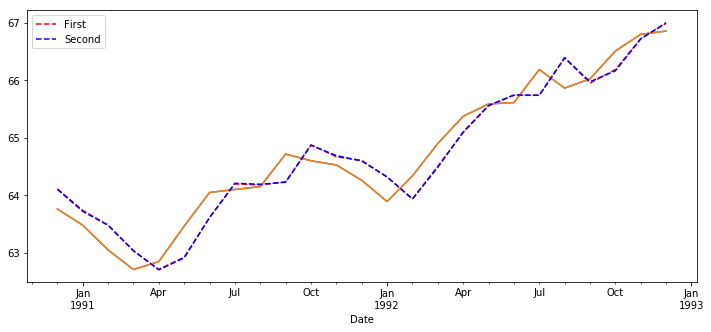

In [61]:
predsk = best_model.predict('1990-12-01','1992-12-01')
tst = first['1990-12-01':'1992-12-01']
r2 = r2_score(tst, predsk)

model1=sm.tsa.statespace.SARIMAX(first, order=(0, 1, 2), trend='ct').fit()
#print(model_ARIMA.summary())

predsk1 = model1.predict('1990-12-01','1992-12-01')
tst1 = first['1990-12-01':'1992-12-01']
r21 = r2_score(tst1, predsk1)

print("First test R2: ", r2)
print("First test AIC=", model_ARIMA.aic)
print("Second test R2: ", r21)
print("SEcond test AIC=", model_ARIMA1.aic)
tst.plot(figsize=(12, 5))
predsk.plot(figsize=(12, 5), style='r--', legend=True, label='First')
tst1.plot()
predsk1.plot(figsize=(12, 5), style='b--', legend=True, label='Second')
plt.show()